# Experiential Explanation Generation

## Imports and initialization

In [1]:
# Bring your packages onto the path
import src.rl_minigrid.utils as utils
from src.explanation_generation.scene_q_visualizer import SceneQVisualizer
from src.explanation_generation.influence_predictors_manager import InfluencePredictorsManager
from src.explanation_generation.explanation_generation import ExplanationGenerator
import torch
import gym
import os 
import matplotlib.pyplot as plt
import numpy as np 

************************
Registering Environments
DONE!
*********************************************


In [2]:

# Main function
# Loads and initialization (Do we need all this?)
bad = "blue"
modelname = "LivingRoomEnv9-"+bad
storage_directory = utils.get_storage_dir()
model_dir = os.path.join(storage_directory, modelname)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
memory = False  # Assume agent doesn't use LSTM
text = False
argmax = True  # This can get us the probabilities.
env_name = "MiniGrid-LivingRoomEnv9x9-v0"
env = gym.make(env_name)
agent = utils.Agent(env.observation_space, env.action_space, model_dir, device=device, argmax=argmax,
                        use_memory=memory,
                        use_text=text)

influence_predictors = InfluencePredictorsManager(device, model_dir, 'bad_dqn.model','goal_dqn.model','other_dqn.model')

In [3]:
scenes_folders = {}
path = os.path.join(storage_directory, 'observations')
for i,j,k in os.walk(path):
    foldername = i.split("/")[-1] 
    if "purple" in foldername or "blue" in foldername: 
        scenes_folders[foldername] = os.path.join(path,foldername)+"/"

## Counterfactual trajectory generation

In [4]:
foldername = "LivingRoomEnv9-blue-scene3"
folderpath = scenes_folders[foldername]

In [5]:
e_g = ExplanationGenerator(folderpath, influence_predictors, agent)

In [6]:
original_path = e_g.explanation_graph.paths['main'].get_edges_with_q_values()
counterfactual_action_seq = [1,2,2]
new_path_name = e_g.get_path(original_path, 0, len(original_path), "custom", counterfactual_action_seq)

Action seq:  [1, 2, 2]


## Generate aggregate explanation

MAIN
(1,4)(1,3)(1,3)(2,3)(3,3)(4,3)(5,3)(6,3)(7,3)(7,3)
3300000001
0.02 0.01 0.01 0.02 0.02 0.02 0.01 0.01 0.01 0.01
0.04 0.03 0.03 0.05 0.06 0.08 0.14 0.26 0.49 0.49

(1,4)(1,5)(1,6)(2,6)(3,6)(4,6)(5,6)(6,6)(6,5)(6,4)(6,4)
11000003330
0.02 0.07 0.07 0.14 0.23 0.16 0.03 0.02 0.01 0.01 0.01
0.04 0.07 0.06 0.06 0.06 0.05 0.08 0.13 0.26 1.01 1.01



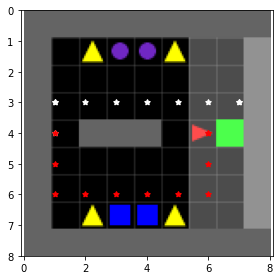

Main Reward:  0.9877777777777778
Counter Reward:  0.9844444444444445
Main average Q:  0.9893024961153666
Counter average Q:  0.9297223627567291
Q difference:  0.05958013335863743
Length Difference:  -1
Main average bad Q:  0.016958471180664167
Counter average bad Q:  0.07662696093320846
Main average goal Q:  0.18705259015162787
Counter average goal Q:  0.28178606517612936
bad Q difference:  -0.059668489752544296
goal Q difference:  -0.0947334750245015
----------------------
The agent doesn't prefer this path as it generally gives less reward. The agent prefers shorter paths. The counter path is more influenced by bad objects than the main path. 


In [7]:
e_g.explanation_full_trajectory('main', new_path_name)